# Экономика банановой республики
## Описание
Модель роста экономики, построенной на производстве и подтреблении одного товара (бананов), описывается следующими уравнениями:
- на функцию производства:
$$O(t) = 100 * \sqrt{M(t)}$$ 
- правило инвестиций:
$$T(t) = s*O(t)$$
- баланс потребления и инвестиций:
$$O(t) = C(t) + I(t)$$
- баланс инвестиций и амортизации:
$$M(t+1) = M(t) + I(t) - d * M(t)$$
Здесь: $O(t)$ - объем производства, $M(t)$ - количество машин, $I(t)$ - объем инвестиций, $C(t)$ - объем подтребления, $s$ - коэффициент нормы накоплений, $d$ - коэффициент нормы амортизации.
## Задание
1. Пользуясь представленными уравнениями смоделируйте процесс роста экономики банановой республики;
1. Изучите равновесия и характер поведения объема производства при различных значениях параметров s и t;
1. Попытайтесь объяснить полученные результаты.

## Выполнение задания

### Построение модели

In [15]:
import sys
sys.setrecursionlimit(1000000)

In [16]:
import numpy as np
from tqdm.notebook import trange, tqdm
import matplotlib.pylab as plt

$$O(t) = C(t) + I(t) => C(t) = O(t) - I(t)$$

In [17]:
class BananEconomicsModel():
    def __init__(self, s, d, M0=100):
        self.s = s
        self.d = d
        self.M0 = M0
        self._next_step = 1
        self.production = []
        self._m_cache = {}

    def _O(self, t):
        return 100 * np.sqrt(self._M(t))
    
    def _I(self, t):
        return self.s * self._O(t)
    
    def _С(self, t):
        return self._O(t) - self._I(t)
    
    def _M(self, t):
        if t <= 0:
            return self.M0
        
        if t - 1 in self._m_cache:
            m_prev = self._m_cache[t - 1]
        else:
            m_prev = self._M(t - 1)
            self._m_cache[t - 1] = m_prev


        m_curr =  m_prev + self._I(t - 1) - self.d * m_prev
        self._m_cache[t] = m_curr
        return m_curr
    
    def simulate(self, iter_count=100):
        for t in trange(self._next_step, self._next_step + iter_count, leave=False):
            ot = self._O(t)
            self.production.append(ot)
        
        self._next_step = self._next_step + iter_count
        

### Построение графиков

Построим графики зависимости объема производства от времени для различных параметров s и d

In [18]:
def plot_d(d):
    iter = 100
    plt.figure(figsize=(20, 12))

    
    for s in np.linspace(0, 1, 20):
        simulation = BananEconomicsModel(s, d)
        simulation.simulate(iter)
        y_max = max(simulation.production)
        x_max = next(i for i, y in enumerate(simulation.production) if y == y_max )

        plt.plot(simulation.production, label=f's={s:.2f}, d={d:.2f}, O_max={y_max:.2f}, O_res={simulation.production[-1]:.2f}')
        plt.scatter(x_max, y_max, color='red')
        plt.annotate(f'{y_max:.2f}', (x_max, y_max), textcoords="offset points", xytext=(0,10), ha='center')

        if x_max != len(simulation.production) - 1:
            plt.scatter(len(simulation.production) - 1, simulation.production[-1], color='blue')
            plt.annotate(f'{simulation.production[-1]:.2f}', (len(simulation.production) - 1, simulation.production[-1]), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.xlabel('Time')
    plt.ylabel('Production')
    plt.title(f'Production over time for d = {d:.2f}')
    plt.legend()
    plt.show()
    

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

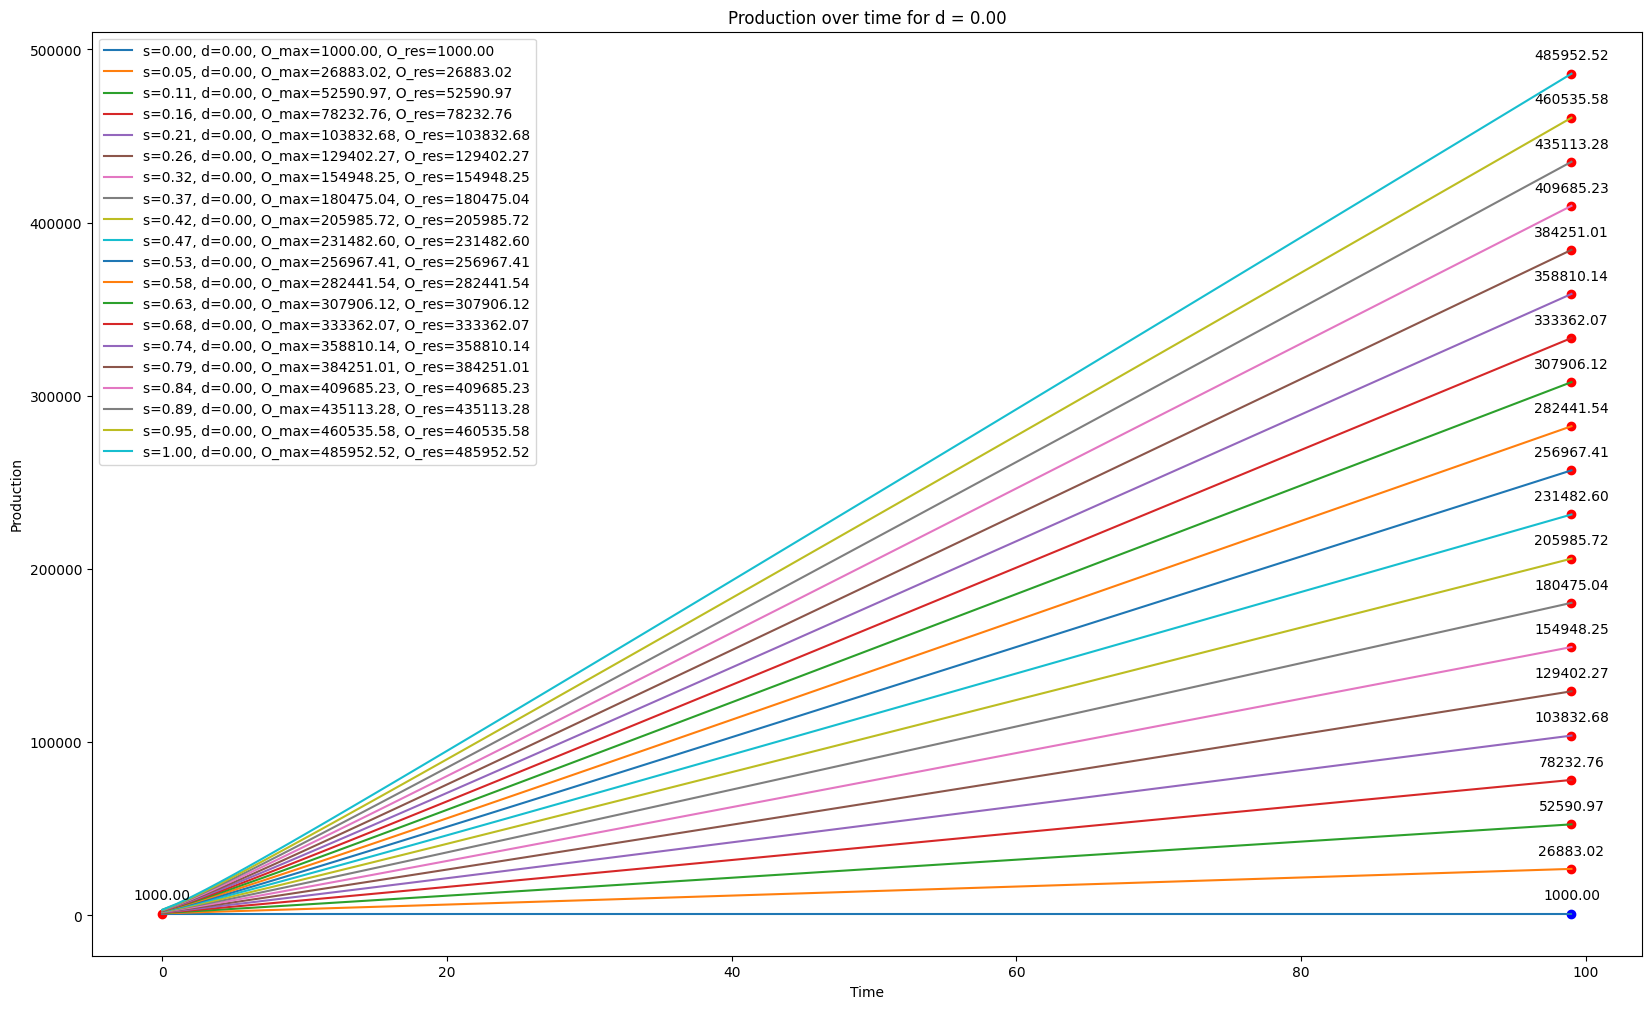

In [19]:
d = 0
plot_d(d)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

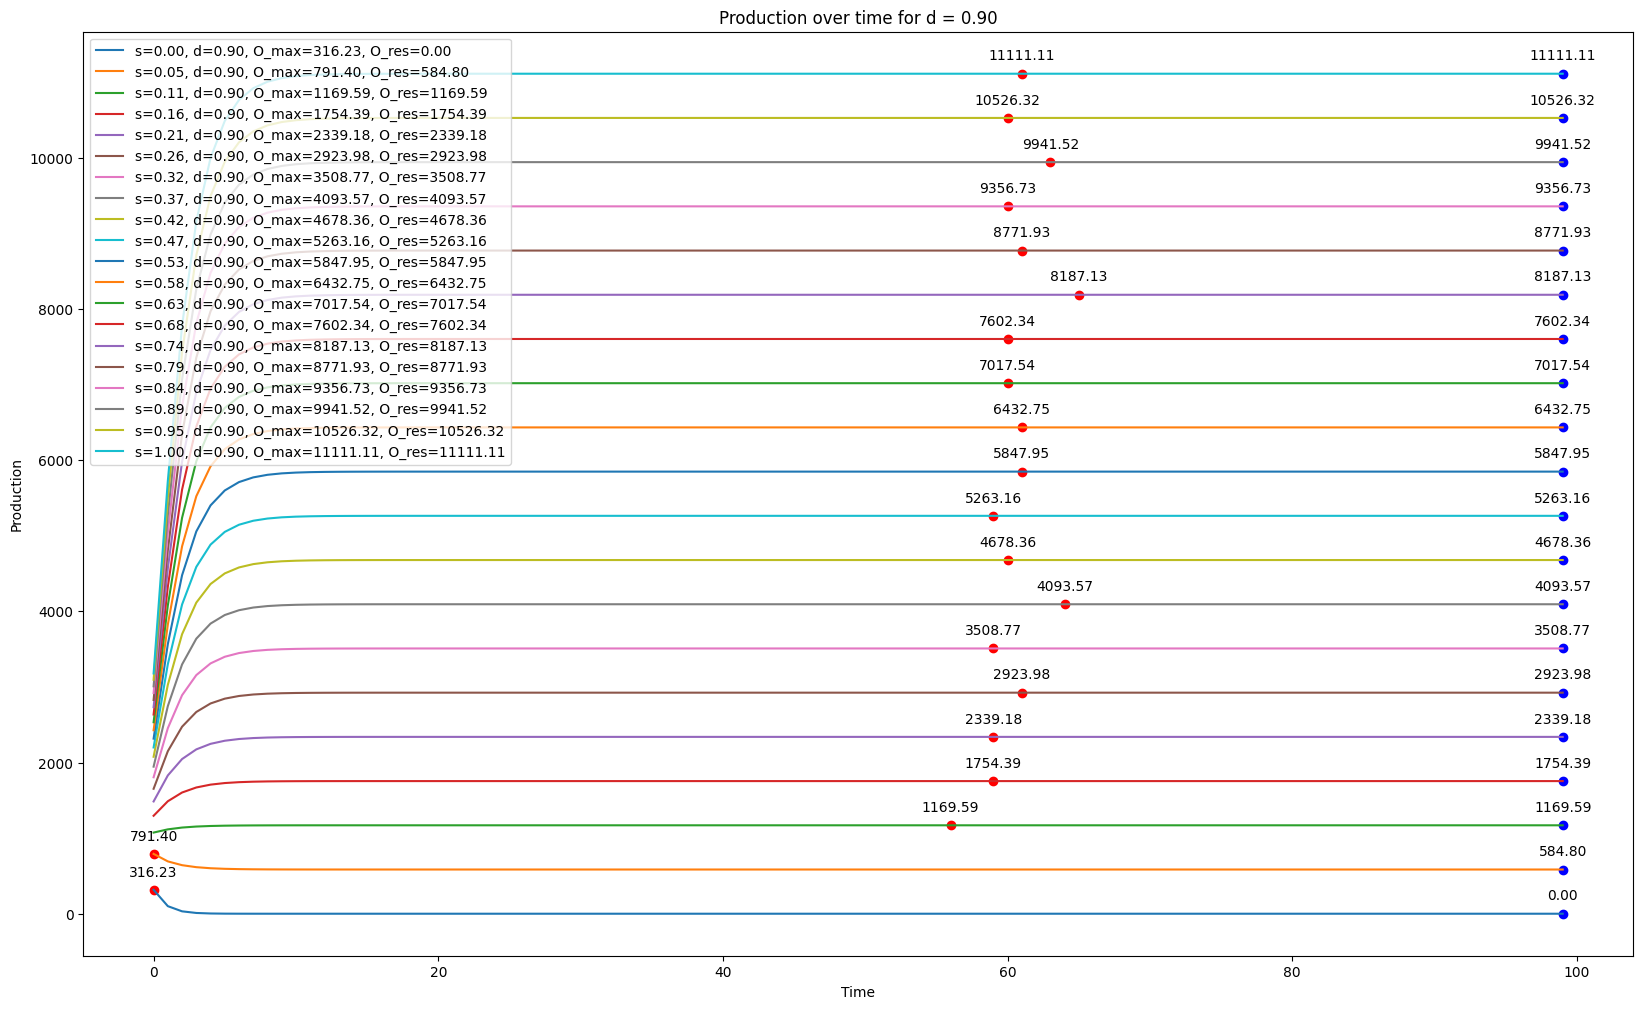

In [20]:
d = 0.9
plot_d(d)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

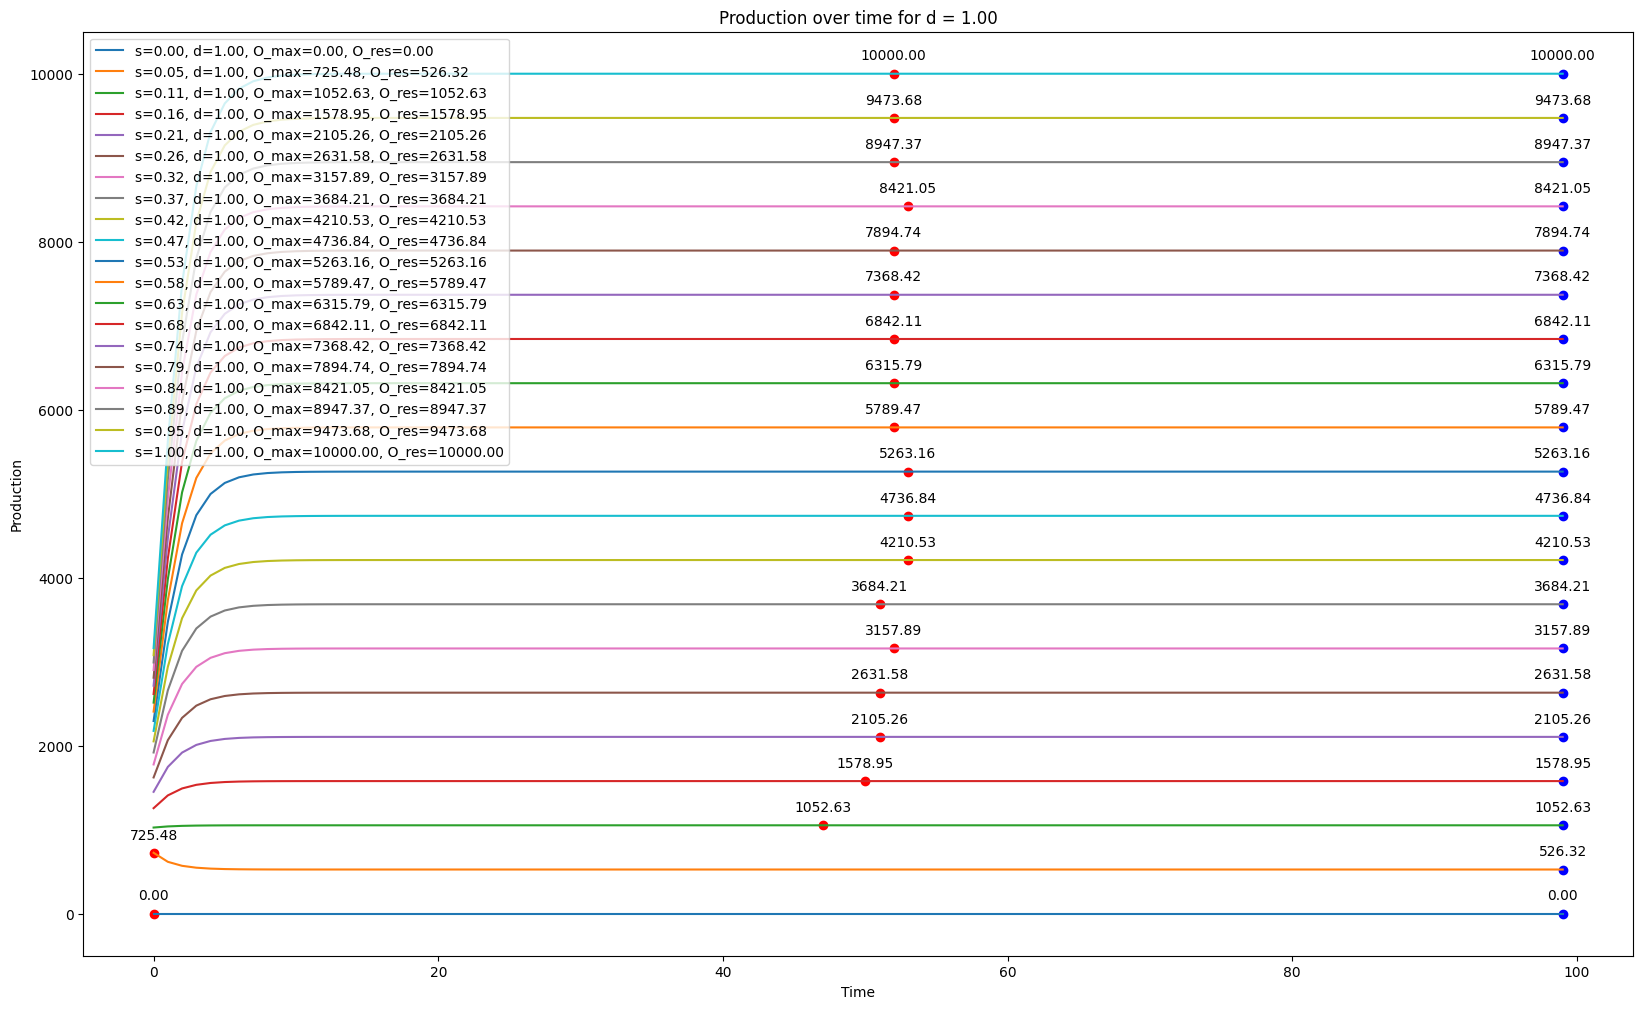

In [21]:
d = 1
plot_d(d)

In [22]:
def plot_s(s):
    iter = 100
    plt.figure(figsize=(20, 12))

    
    for d in np.linspace(0, 1, 10):
        simulation = BananEconomicsModel(s, d)
        simulation.simulate(iter)
        y_max = max(simulation.production)
        x_max = next(i for i, y in enumerate(simulation.production) if y == y_max )

        plt.plot(simulation.production, label=f's={s:.2f}, d={d:.2f}, O_max={y_max:.2f}, O_res={simulation.production[-1]:.2f}')
        plt.scatter(x_max, y_max, color='red')
        plt.annotate(f'{y_max:.2f}', (x_max, y_max), textcoords="offset points", xytext=(0,10), ha='center')

        if x_max != len(simulation.production) - 1:
            plt.scatter(len(simulation.production) - 1, simulation.production[-1], color='blue')
            plt.annotate(f'{simulation.production[-1]:.2f}', (len(simulation.production) - 1, simulation.production[-1]), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.xlabel('Time')
    plt.ylabel('Production')
    plt.title(f'Production over time for s = {s:.2f}')
    plt.legend()
    plt.show()
    

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

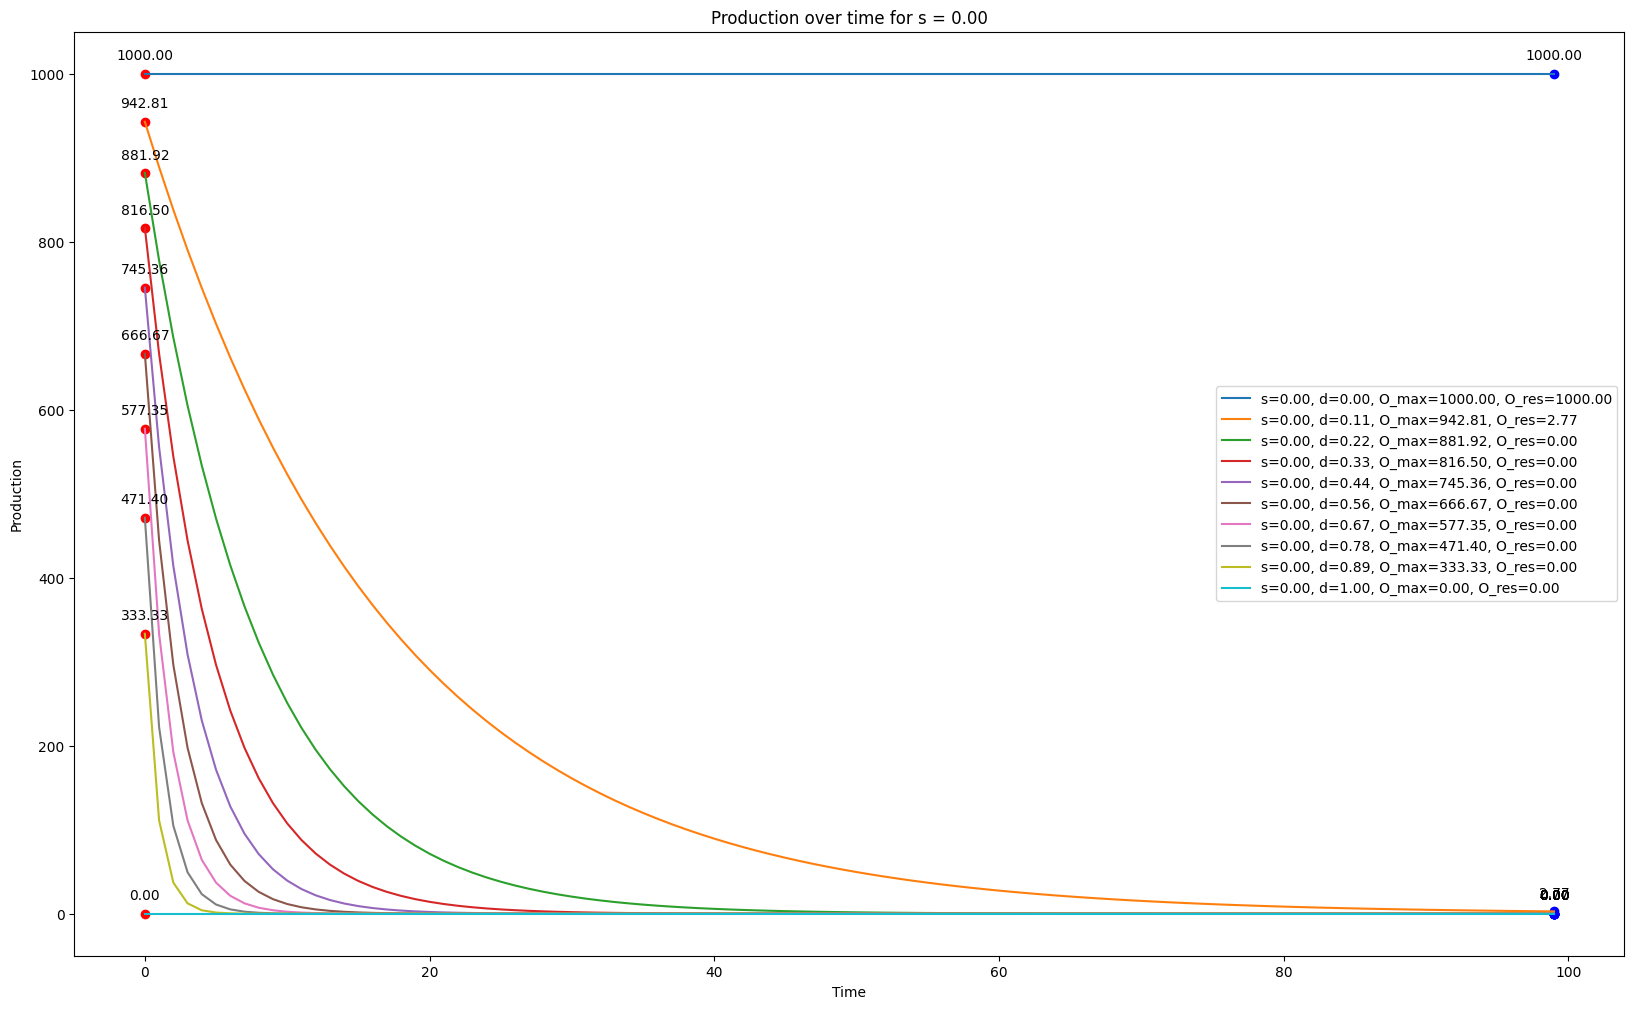

In [23]:
s = 0
plot_s(s)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

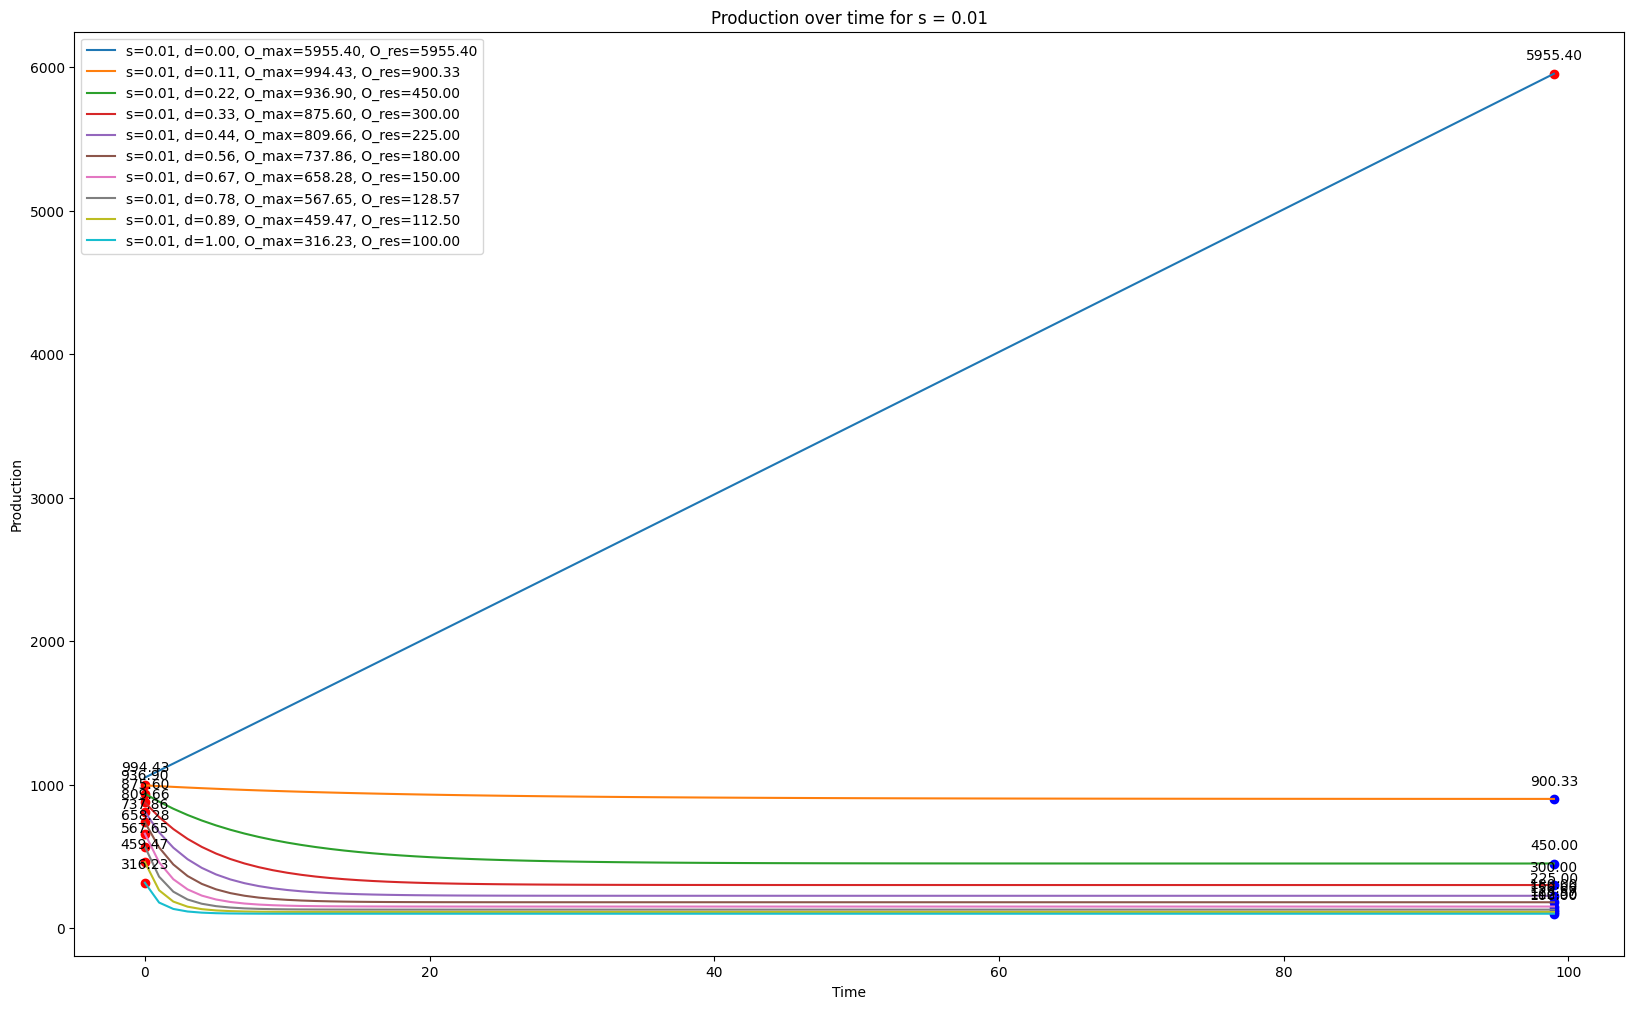

In [24]:
s = 0.01
plot_s(s)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

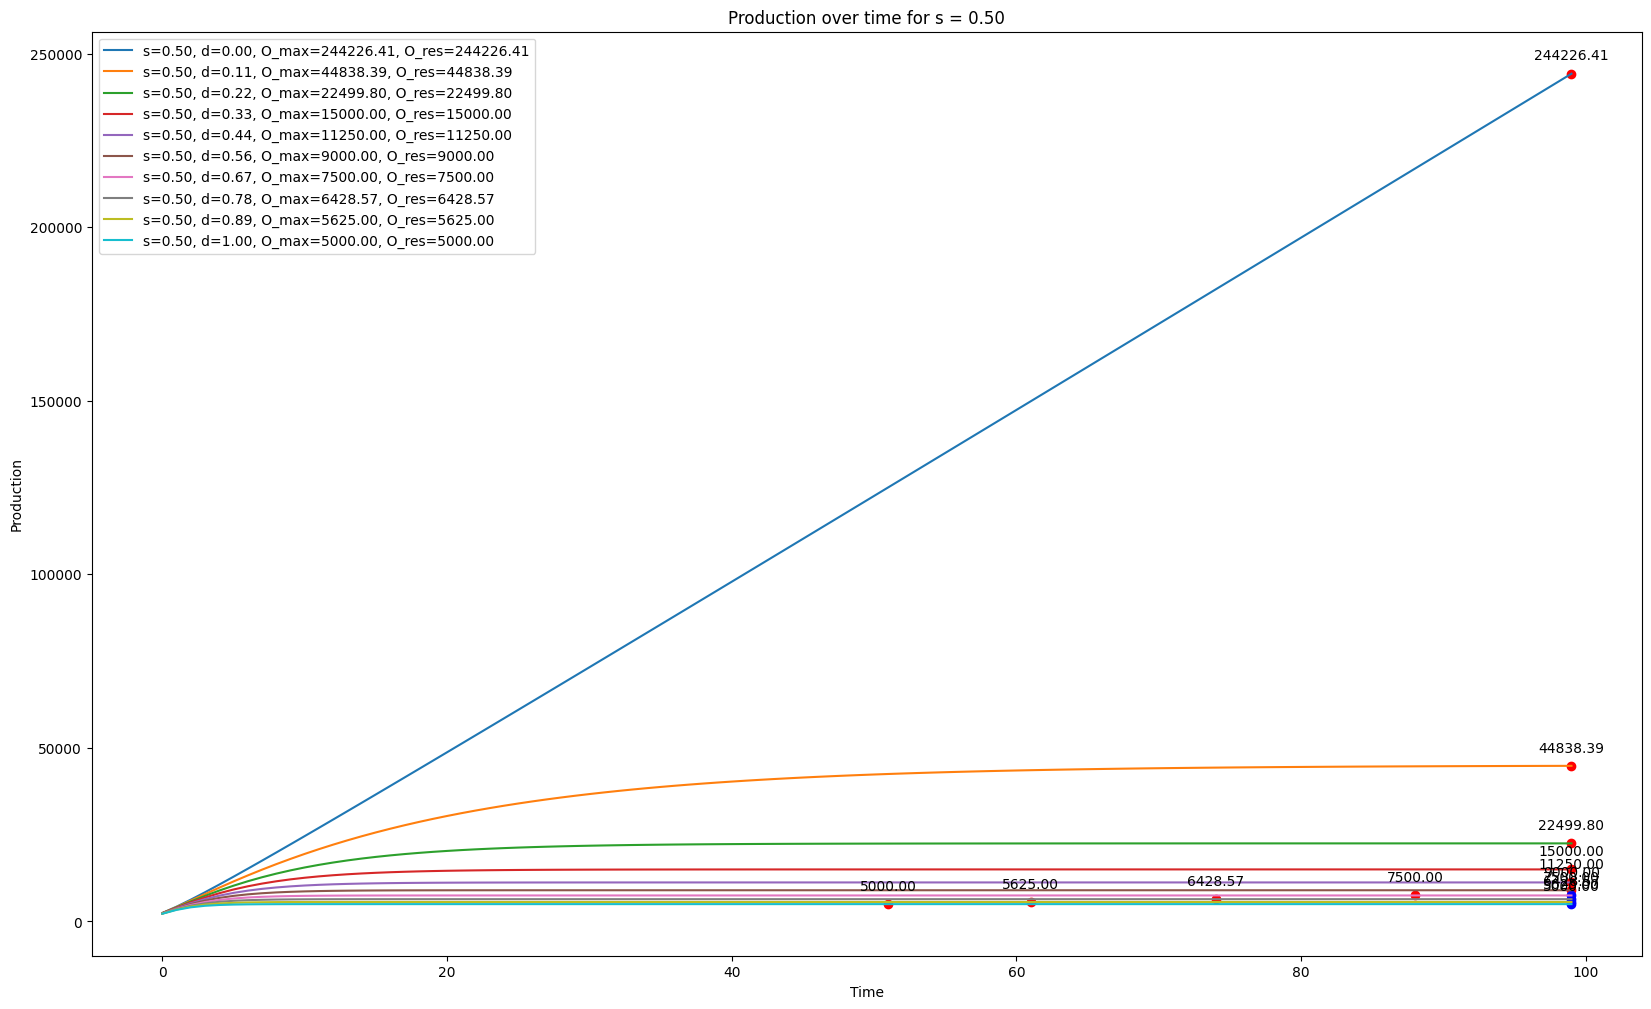

In [25]:
s = 0.5
plot_s(s)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

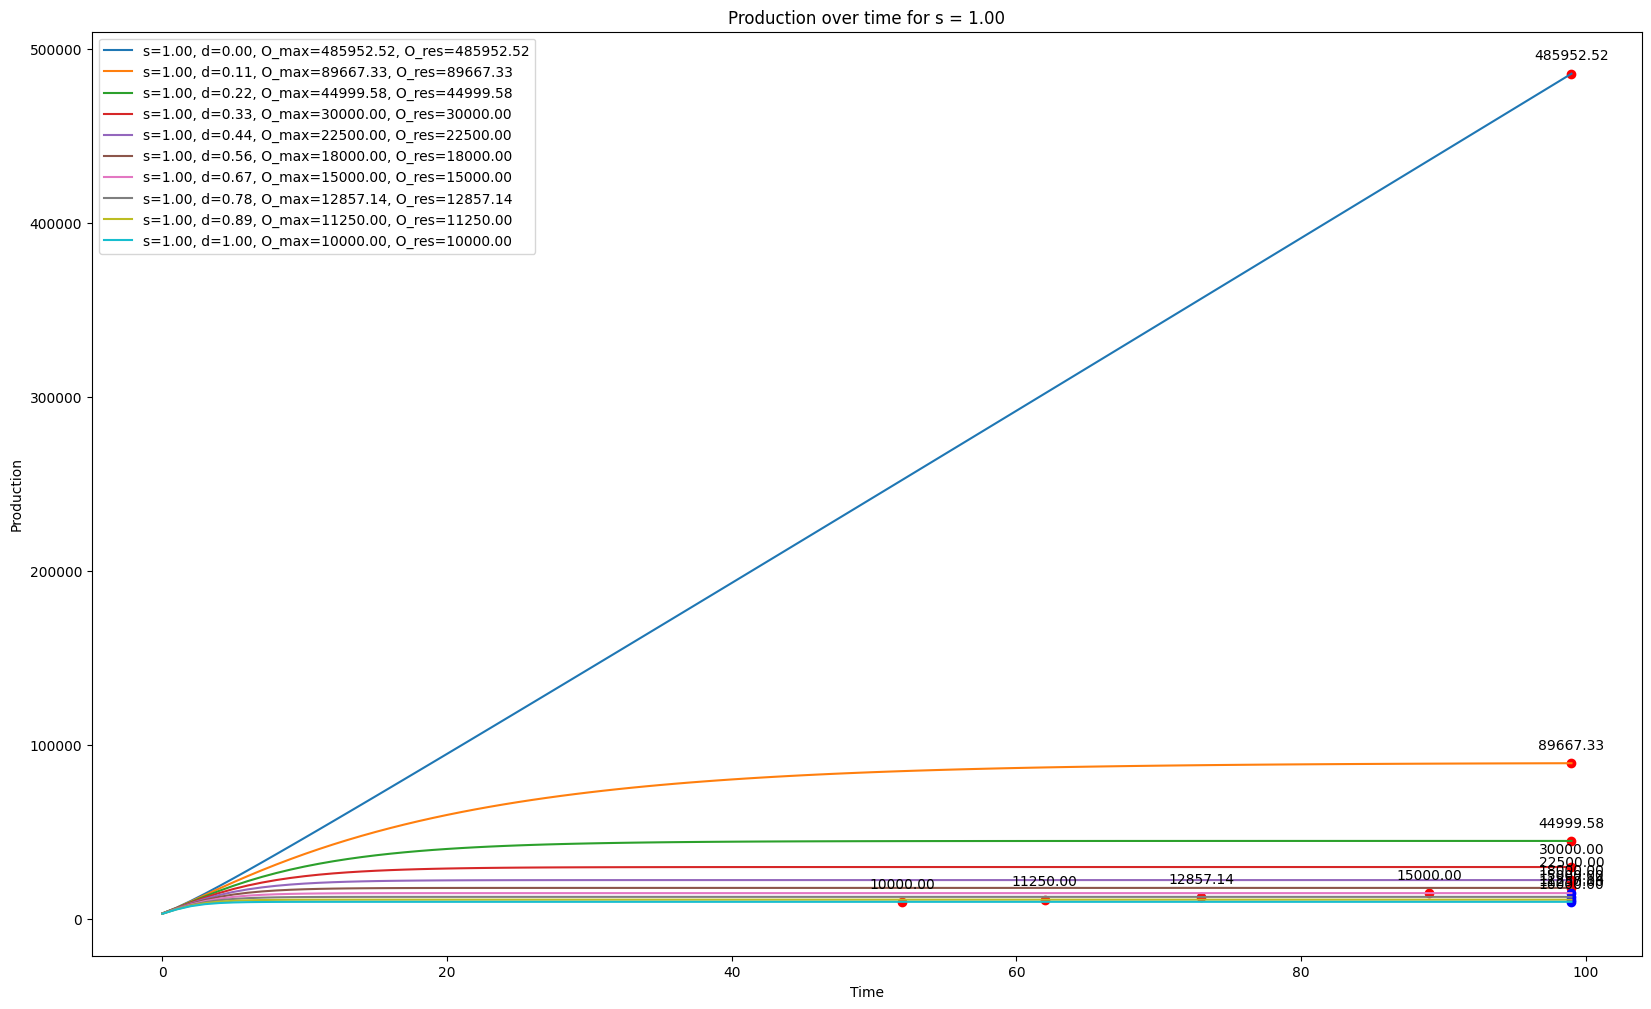

In [26]:
s = 1
plot_s(s)

In [27]:
from matplotlib import cm

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

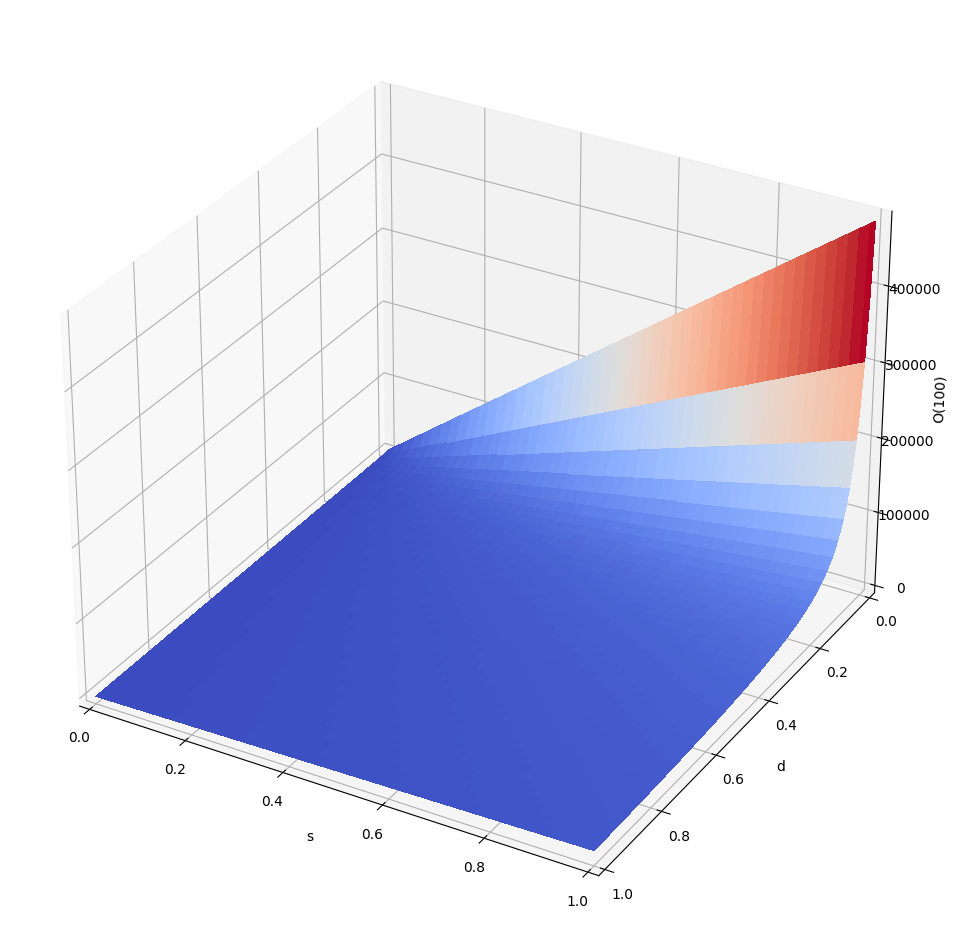

In [28]:
X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)

t = 100

Z = []
for x in tqdm(X, leave=False):
    z = []
    for y in tqdm(Y, leave=False):
        simulation = BananEconomicsModel(x, y)
        z.append(simulation._O(t))
    Z.append(z)

Z = np.array(Z).T

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel('s')
ax.set_ylabel('d')
ax.set_zlabel(f'O({t})')

ax.set_xlim(0, 1)
ax.set_ylim(1, 0)

plt.show()

Таким образом видно что при d = 0 рост линеен, а при увелияении d происходит более резкий скачек в начале, скорость которого увеличивается при росте d, но потом появляется некоторое ораничение объема производства сверху, которое уменьшается при росте d. Параметр s же влияет на величину этого ограничения сверху. Интересное поведение наблюдается при значениях s близких к 0, тогда со временем происходит потеря изначального потенциала